# Impact of biharmonic and shear-driven mixing on the EUC

Gustavo Marques (gmarques@ucar.edu)

Last update: 04/03/2020

### Experiments 
* G36: forced run, G25 + BIHARMONIC=False 
* G37: forced run, G25 + USE_LMD94=False
* G38: forced run, G25 + BIHARMONIC=True, AH=1.0E9, MEKE_VISCOSITY_COEFF_AU = 0.0 

### Time averages:
Run for 2 years, time averages over last year

# Globally-averaged ocean properties

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
path = '/glade/scratch/gmarques/'
exps = ['g.c2b6.GJRA.TL319_t061.long_JRA_mct.036',\
        'g.c2b6.GJRA.TL319_t061.long_JRA_mct.037',\
       'g.c2b6.GJRA.TL319_t061.long_JRA_mct.038']
labels = ['G36', 'G37', 'G38']

def get_data(full_path, variables):
  def preprocess(ds):
    ''' Return the dataset with variable'''
    return ds[variables]
  ds = xr.open_mfdataset(full_path, data_vars='minimal', \
                         coords='minimal', compat='override', preprocess=preprocess)
  return ds

import seaborn, matplotlib
matplotlib.rcParams.update({'font.size': 14})

In [3]:
# load pre-difined masks
from mom6_tools.MOM6grid import MOM6grid
from mom6_tools.m6toolbox import genBasinMasks
from mom6_tools.m6plot import ztplot, polarplot, xyplot, xycompare
import cartopy.crs as ccrs
import cartopy.feature
grd = MOM6grid('/glade/scratch/gmarques/'+exps[0]+'/run/'+exps[0]+'.mom6.static.nc')
depth = grd.depth_ocean
# remote Nan's, otherwise genBasinMasks won't work
depth[np.isnan(depth)] = 0.0
basin_code = genBasinMasks(grd.geolon, grd.geolat, depth, xda=True)

Basemap module not found. Some regional plots may not function properly
MOM6 grid successfully loaded... 

11.16427964664149 64.78854837178643 [391, 434]


/glade/scratch/gmarques/g.c2b6.GJRA.TL319_t061.long_JRA_mct.036/run/*mom6.hm_*.nc
/glade/scratch/gmarques/g.c2b6.GJRA.TL319_t061.long_JRA_mct.037/run/*mom6.hm_*.nc
/glade/scratch/gmarques/g.c2b6.GJRA.TL319_t061.long_JRA_mct.038/run/*mom6.hm_*.nc


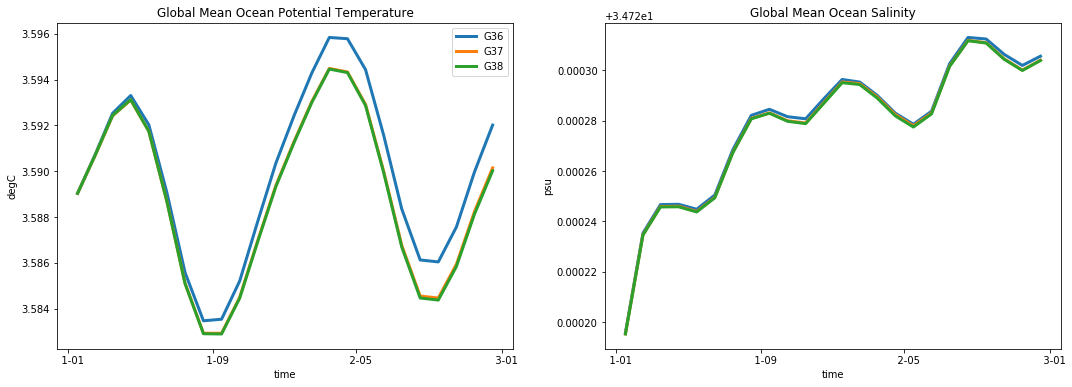

In [4]:
%matplotlib inline

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,6))
variables = ['thetaoga', 'soga']
for i in range(len(exps)):
  tmp = path+exps[i]+'/run/*mom6.hm_*.nc'
  print(tmp)
  ds = get_data(tmp,variables)
  ds1 = ds.sel(time=slice('0001-01-01', '0059-01-01'))
  ds1['thetaoga'].plot(ax=ax[0], label=labels[i], lw=3)
  ds1['soga'].plot(ax=ax[1], lw=3)

ax[0].set_title(ds1.thetaoga.attrs['long_name']); ax[0].set_ylabel(ds1.thetaoga.attrs['units'])
ax[1].set_title(ds1.soga.attrs['long_name']); ax[1].set_ylabel(ds1.soga.attrs['units']); ax[0].legend()

/glade/scratch/gmarques/g.c2b6.GJRA.TL319_t061.long_JRA_mct.036/run/ocean.stats.nc
/glade/scratch/gmarques/g.c2b6.GJRA.TL319_t061.long_JRA_mct.037/run/ocean.stats.nc
/glade/scratch/gmarques/g.c2b6.GJRA.TL319_t061.long_JRA_mct.038/run/ocean.stats.nc


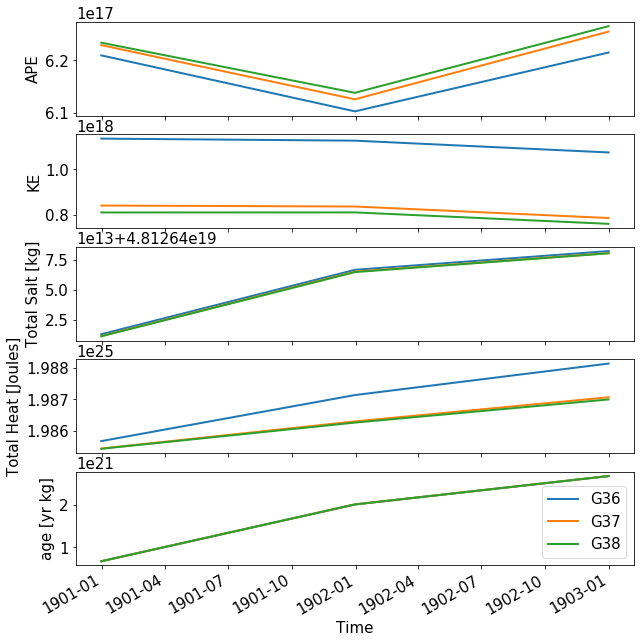

In [5]:
import pandas as pd
plt.rcParams.update({'font.size': 15})
variables = ['APE', 'KE', 'Salt', 'Heat', 'age']
fig, ax = plt.subplots(nrows=len(variables), ncols=1, figsize=(10,10), sharex=True)
for i in range(len(exps)): 
  path_to_file = path+exps[i]+'/run/ocean.stats.nc'
  print(path_to_file)
  ds = xr.open_dataset(path_to_file)
  time = pd.date_range('1900-01-01', periods=len(ds.Time), freq='D')

  ds['Time'] = time[:]  
  ds1 = ds.resample(Time="1Y", closed='left', keep_attrs=True).mean(dim='Time', keep_attrs=True)   
  ds2 = ds1.sel(Time=slice('1900-01-01', '1980-01-01'))
  for var, j in zip(variables, range(len(variables))):
    if len(ds2[var].shape) > 1:
        tmp = ds2[var].sum(axis=1)
    else:
        tmp = ds2[var]
    tmp.plot(ax=ax[j], label=labels[i], lw=2)
    ax[j].set_xlabel('')
    
ax[j].set_xlabel('Time'); ax[j].legend()

# Equatorial plots

## Temperature

<center> <font size="4">Equatorial_Global_temperature</font></center>
<table><tr>
    <td><img src='../figures/g.c2b6.GJRA.TL319_t061.long_JRA_mct.036_Equatorial_Global_temperature.png'></td>
    <td><img src='../figures/g.c2b6.GJRA.TL319_t061.long_JRA_mct.037_Equatorial_Global_temperature.png'></td>
    </tr>
    <tr>
    <td><img src='../figures/g.c2b6.GJRA.TL319_t061.long_JRA_mct.037_Equatorial_Global_temperature.png'></td>
        </tr>    
</table>

## Salinity

<center> <font size="4">Equatorial_Global_salinity</font></center>
<table><tr><td>
    <img src='../figures/g.c2b6.GJRA.TL319_t061.long_JRA_mct.036_Equatorial_Global_salinity.png'></td>
    <td><img src='../figures/g.c2b6.GJRA.TL319_t061.long_JRA_mct.037_Equatorial_Global_salinity.png'></td>
    </tr>
    <tr>
    <td><img src='../figures/g.c2b6.GJRA.TL319_t061.long_JRA_mct.037_Equatorial_Global_salinity.png'></td>
        </tr>
</table>

## Undercurrent

<center> <font size="4">Equatorial_Pacific_uo</font></center>
<table><tr><td><img src='../figures/g.c2b6.GJRA.TL319_t061.long_JRA_mct.036_Equatorial_Pacific_uo.png'></td></tr><tr>
             <td><img src='../figures/g.c2b6.GJRA.TL319_t061.long_JRA_mct.037_Equatorial_Pacific_uo.png'></td></tr> 
    <tr><td><img src='../figures/g.c2b6.GJRA.TL319_t061.long_JRA_mct.038_Equatorial_Pacific_uo.png'></td></tr>
</table>

#### For comparison, let's plot the EUC for G25 during the same period

<center> <font size="4">Equatorial_Pacific_uo</font></center>
<table><tr><td><img src='../../temporary/g.c2b6.GJRA.TL319_t061.long_JRA_mct.025/PNG/Equatorial/g.c2b6.GJRA.TL319_t061.long_JRA_mct.025_Equatorial_Pacific_uo.png'></td></tr>
</table>

# Mixing coefficients

In [4]:
def get_data_sf(full_path):
  ds = xr.open_dataset(full_path)
  return ds
variables = ['diftrblo', 'difmxylo' ,'difmxybo', 'diftrelo']

## GM (KHTH)

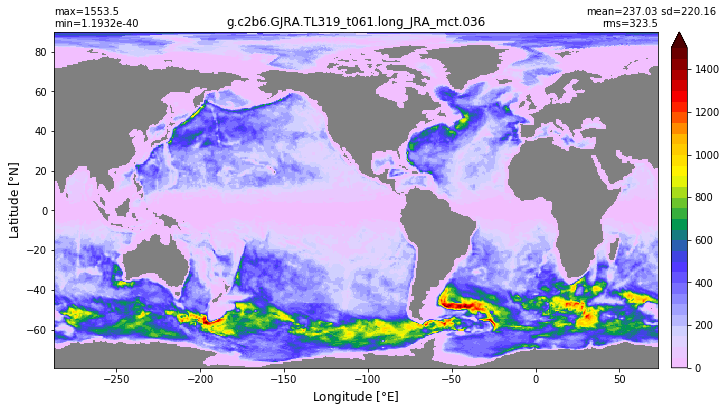

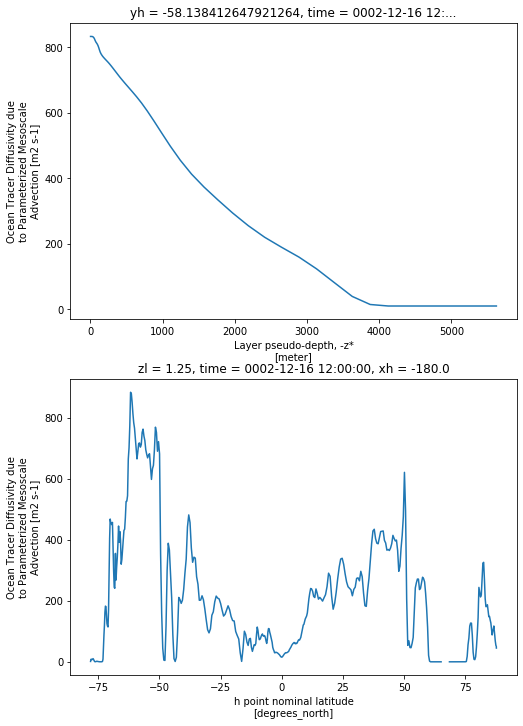

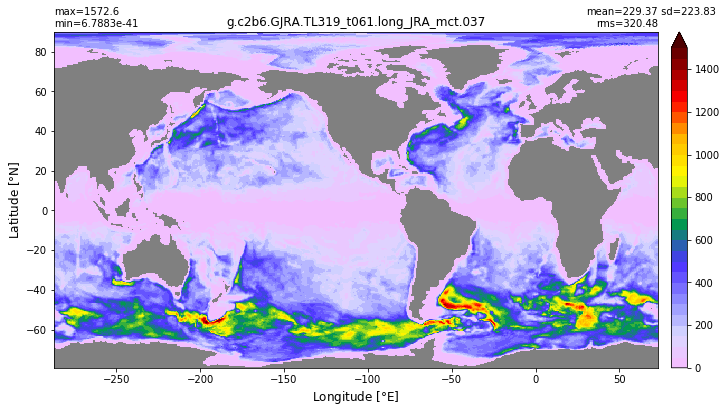

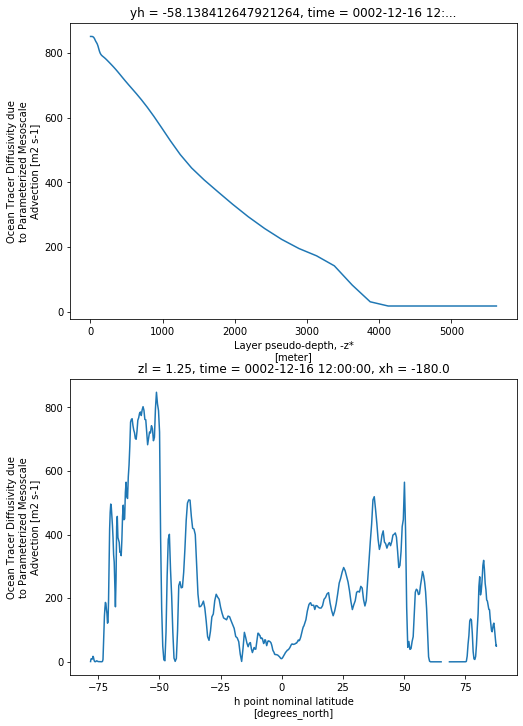

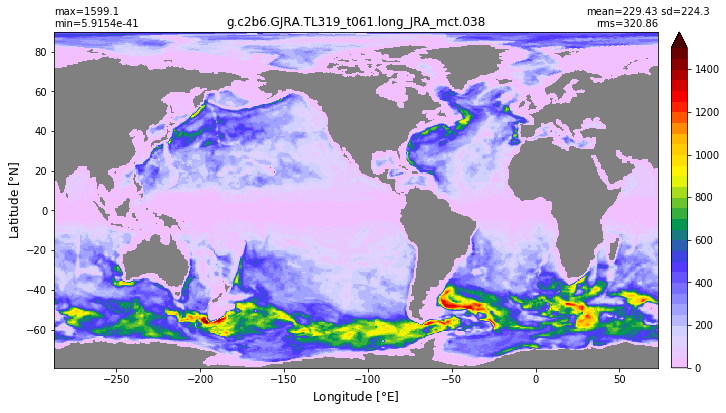

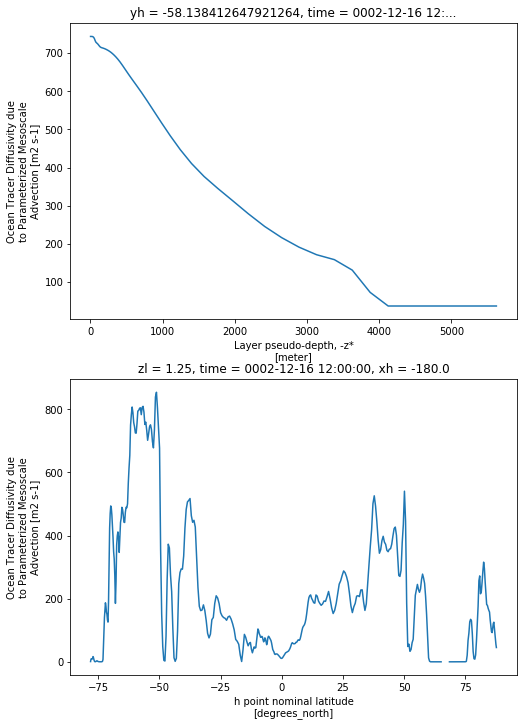

In [6]:
%matplotlib inline
j = np.abs( grd.geolat[:,0] - -58.0 ).argmin()
i = np.abs( grd.geolon[0,:] - -58.0 ).argmin()
i1 = np.abs( grd.geolon[0,:] - -180.0 ).argmin()
for exp in range(len(exps)):
  ds = get_data_sf(path+exps[exp]+'/run/'+exps[exp]+'.mom6.hm_0002_12.nc')
  xyplot(np.ma.masked_invalid(ds[variables[0]][0,0,:].values), grd.geolon, grd.geolat, area=grd.area_t, 
         clim=(0,1500), title=str(exps[exp]))
  f, ax = plt.subplots(2,1, figsize=(8,12))
  ds[variables[0]][0,:,j,i].plot(ax=ax[0])
  ds[variables[0]][0,0,:,i1].plot(ax=ax[1])

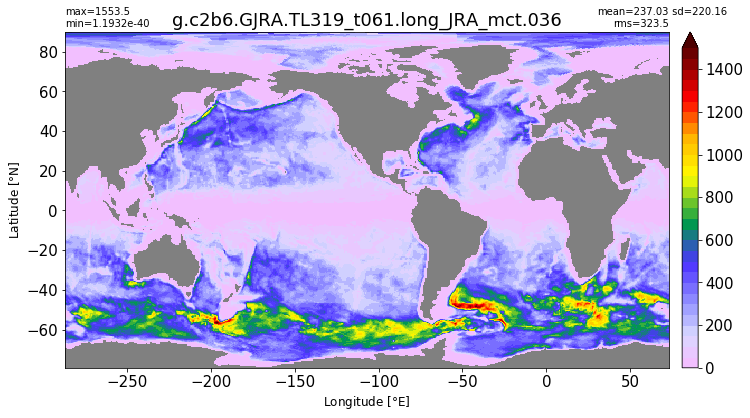

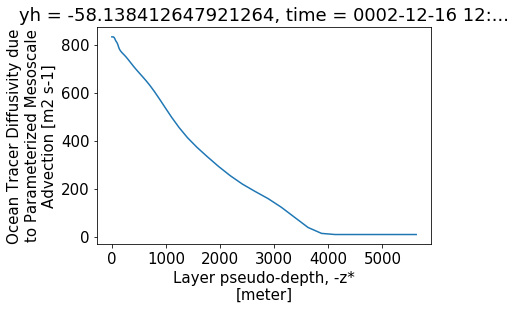

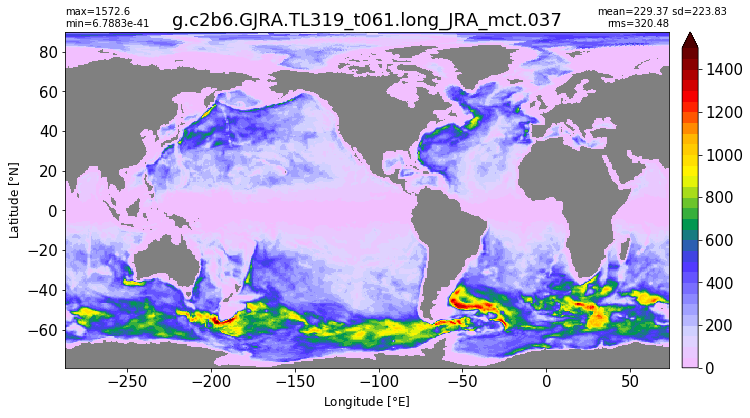

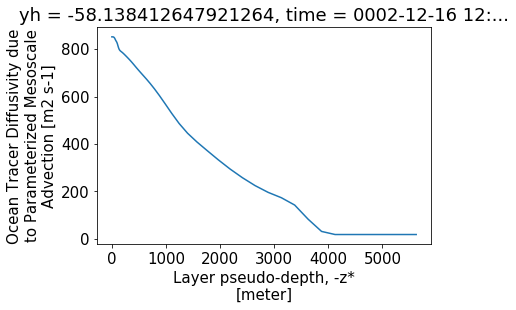

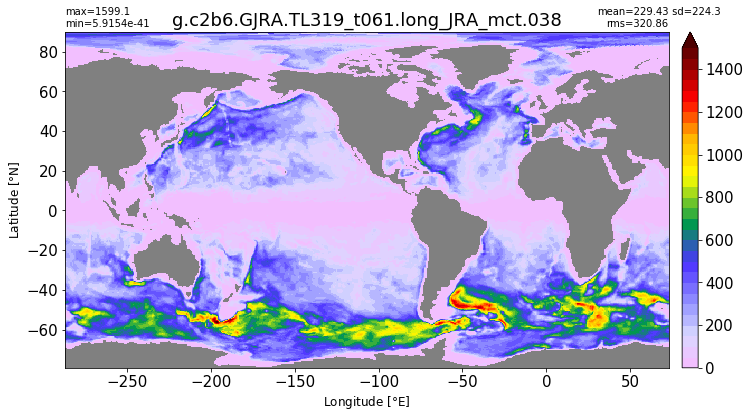

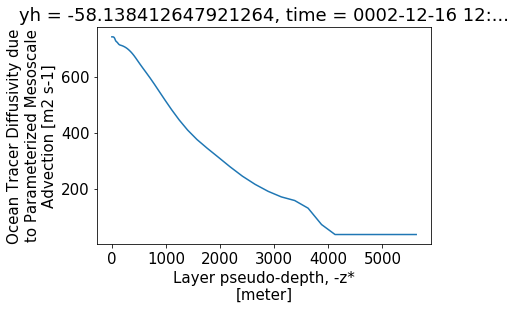

In [11]:
# GM coefficient
# find point in the Drake Passage
j = np.abs( grd.geolat[:,0] - -58.0 ).argmin()
i = np.abs( grd.geolon[0,:] - -58.0 ).argmin()
for exp in range(len(exps)):
  ds = get_data_sf(path+exps[exp]+'/run/'+exps[exp]+'.mom6.hm_0002_12.nc')
  xyplot(np.ma.masked_invalid(ds[variables[0]][0,0,:].values), grd.geolon, grd.geolat, area=grd.area_t, 
         clim=(0,1500), title=str(exps[exp]))
  f, ax = plt.subplots(1,1)
  ds[variables[0]][0,:,j,i].plot(ax=ax)


## Laplacian viscosity

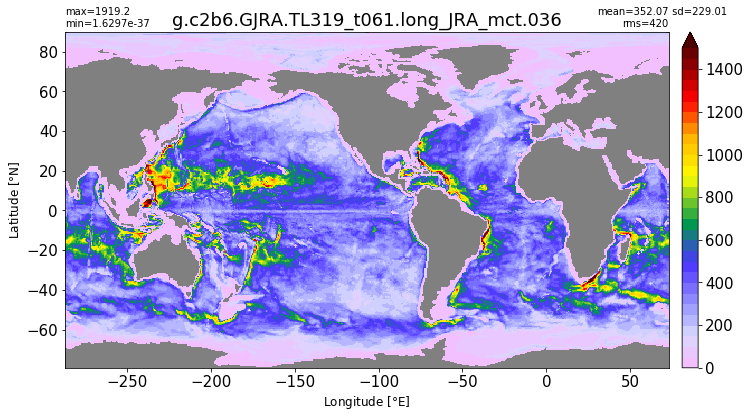

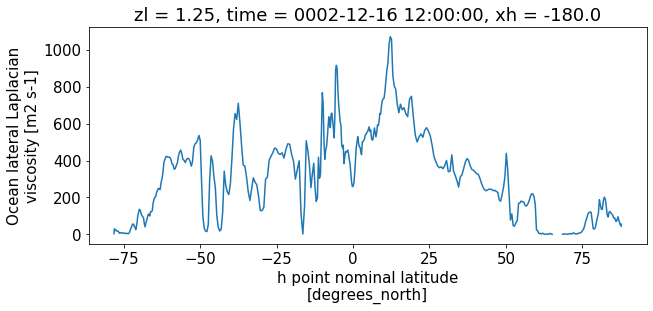

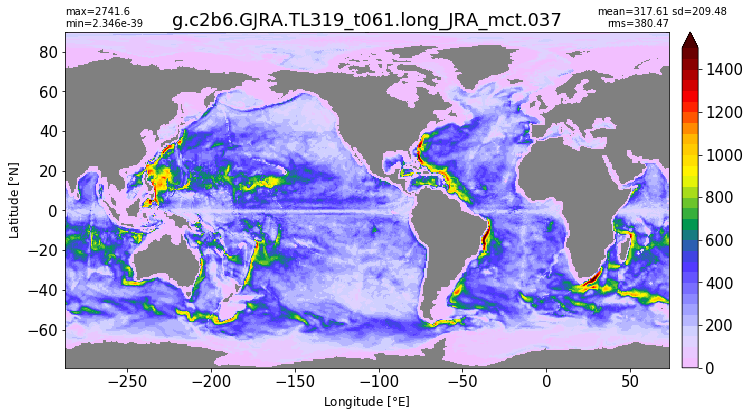

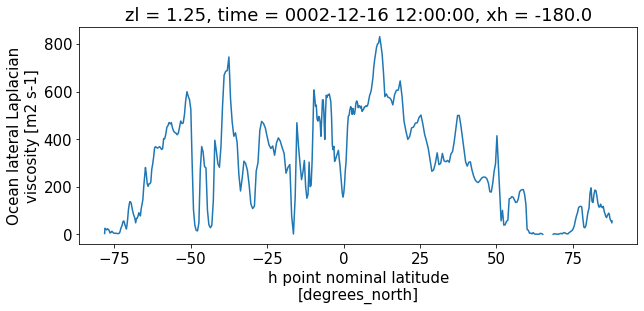

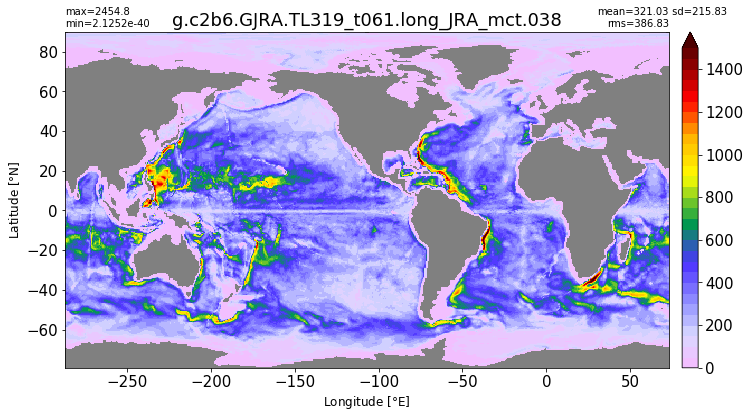

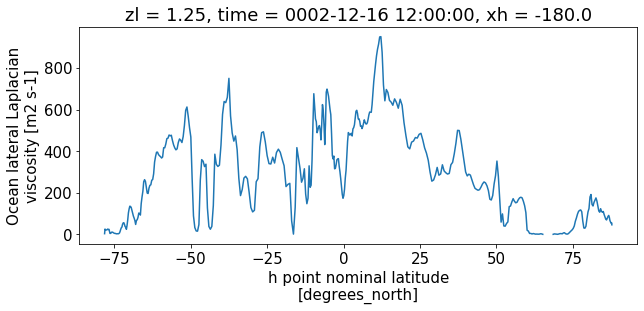

In [20]:
# Laplacian visc
i = np.abs( grd.geolon[0,:] - -180.0 ).argmin()
for exp in range(len(exps)):
  ds = get_data_sf(path+exps[exp]+'/run/'+exps[exp]+'.mom6.hm_0002_12.nc')
  xyplot(np.ma.masked_invalid(ds[variables[1]][0,0,:].values), grd.geolon, grd.geolat, area=grd.area_t, clim=(0,1500), title=str(exps[exp]))
  f, ax = plt.subplots(1,1, figsize=(10,4))
  ds[variables[1]][0,0,:,i].plot(ax=ax)
  #ax.set_title(''); ax[1].set_title('');

## Biharmonic viscosity

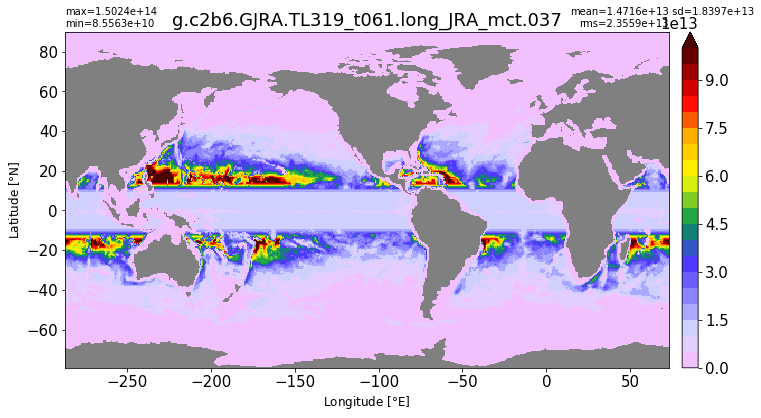

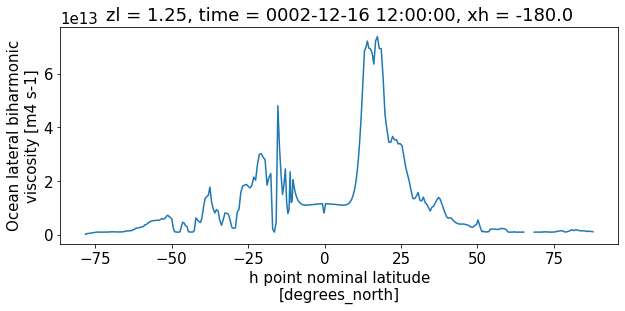

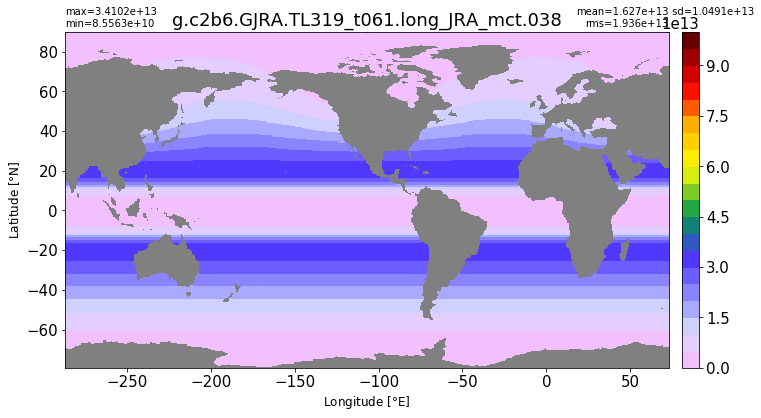

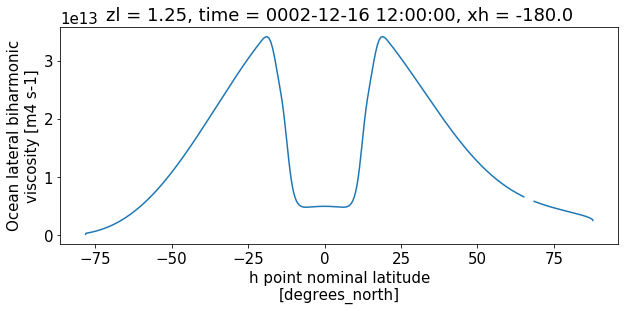

In [19]:
# Biharmonic

i = np.abs( grd.geolon[0,:] - -180.0 ).argmin()
for exp in range(1,len(exps)):
  ds = get_data_sf(path+exps[exp]+'/run/'+exps[exp]+'.mom6.hm_0002_12.nc')
  xyplot(np.ma.masked_invalid(ds[variables[2]][0,0,:].values), grd.geolon, grd.geolat, area=grd.area_t, clim=(1.0e10,1.0e14), title=str(exps[exp]))
  f, ax = plt.subplots(1,1, figsize=(10,4))
  ds[variables[2]][0,0,:,i].plot(ax=ax)
  
  #ax[0].set_title(''); ax[1].set_title('');
    

## Redi (KHTR)

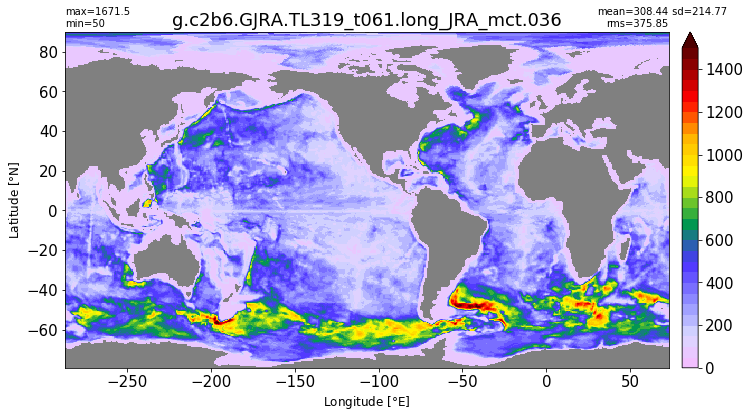

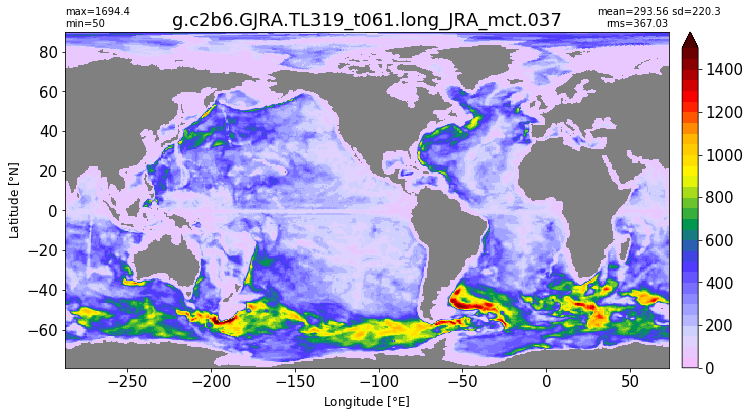

In [12]:
# KHTR (Redi)
# find point in the Drake Passage
j = np.abs( grd.geolat[:,0] - -58.0 ).argmin()
i = np.abs( grd.geolon[0,:] - -58.0 ).argmin()
for exp in range(len(exps)):
  ds = get_data_sf(path+exps[exp]+'/run/'+exps[exp]+'.mom6.hm_0002_12.nc')
  xyplot(np.ma.masked_invalid(ds[variables[3]][0,:].values), grd.geolon, grd.geolat, clim=(0, 1500), area=grd.area_t, title=str(exps[exp]))